In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import datetime
import altair as alt

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
import spacy

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk import ne_chunk

In [ ]:
df = pd.read_csv("Leather_Mag_Text_Cleaned.csv")

In [ ]:
df.head()

,Unnamed: 0,URL,Title,TitleAndDate,Texts
0,0,http://www.leathermag.com/news/newsstahl-expan...,Stahl expands ZDHC level 3certified portfolio,\nStahl expands ZDHC level 3-certified portfol...,\nStahl the world leader in speciality coating...
1,1,http://www.leathermag.com/news/newsbirkenstock...,Birkenstock Posts 1.492 Billion Revenues in Fi...,\nBirkenstock Posts €1.492 Billion Revenues in...,\nBirkenstock a prominent Germanybased global ...
2,2,http://www.leathermag.com/news/newsmacys-inc-r...,Macys Inc. Rejects Unsolicited Proposal from A...,"\nMacy’s, Inc. Rejects Unsolicited Proposal fr...",\nMacys has officially acknowledged the receip...
3,3,http://www.leathermag.com/news/newseu-cracks-d...,EU Cracks Down on Greenwashing and Misleading ...,\nEU Cracks Down on Greenwashing and Misleadin...,\nParliament has granted final approval to a d...
4,4,http://www.leathermag.com/news/newsburberry-ad...,Burberry Adjusts Financial Outlook Amidst Luxu...,\nBurberry Adjusts Financial Outlook Amidst Lu...,\nIn recent update Burberry remains confident ...


#Before performing analysis on the data, we first must clean it (by removing \n from various locations) and put it in a usable format (by separating date from title and splitting it further into day, month, and year)

In [ ]:
df['TitleAndDate'] = df['TitleAndDate'].str.slice(1)
df[['title2', 'Date']] = df['TitleAndDate'].str.split('\n', n=1, expand=True)
df['Date'] = df['Date'].str.slice(stop=-2)
df.head()


,Unnamed: 0,URL,Title,TitleAndDate,Texts,title2,Date
0,0,http://www.leathermag.com/news/newsstahl-expan...,Stahl expands ZDHC level 3certified portfolio,Stahl expands ZDHC level 3-certified portfolio...,\nStahl the world leader in speciality coating...,Stahl expands ZDHC level 3-certified portfolio\r,25 January 2024
1,1,http://www.leathermag.com/news/newsbirkenstock...,Birkenstock Posts 1.492 Billion Revenues in Fi...,Birkenstock Posts €1.492 Billion Revenues in F...,\nBirkenstock a prominent Germanybased global ...,Birkenstock Posts €1.492 Billion Revenues in F...,25 January 2024
2,2,http://www.leathermag.com/news/newsmacys-inc-r...,Macys Inc. Rejects Unsolicited Proposal from A...,"Macy’s, Inc. Rejects Unsolicited Proposal from...",\nMacys has officially acknowledged the receip...,"Macy’s, Inc. Rejects Unsolicited Proposal from...",23 January 2024
3,3,http://www.leathermag.com/news/newseu-cracks-d...,EU Cracks Down on Greenwashing and Misleading ...,EU Cracks Down on Greenwashing and Misleading ...,\nParliament has granted final approval to a d...,EU Cracks Down on Greenwashing and Misleading ...,22 January 2024
4,4,http://www.leathermag.com/news/newsburberry-ad...,Burberry Adjusts Financial Outlook Amidst Luxu...,Burberry Adjusts Financial Outlook Amidst Luxu...,\nIn recent update Burberry remains confident ...,Burberry Adjusts Financial Outlook Amidst Luxu...,16 January 2024


In [ ]:
df['Date'] = df['Date'].str.strip()
df[['Day', 'Month','Year']] = df['Date'].str.split(' ', n=2, expand=True)
df.head()

,Unnamed: 0,URL,Title,TitleAndDate,Texts,title2,Date,Day,Month,Year
0,0,http://www.leathermag.com/news/newsstahl-expan...,Stahl expands ZDHC level 3certified portfolio,Stahl expands ZDHC level 3-certified portfolio...,\nStahl the world leader in speciality coating...,Stahl expands ZDHC level 3-certified portfolio\r,25 January 2024,25,January,2024
1,1,http://www.leathermag.com/news/newsbirkenstock...,Birkenstock Posts 1.492 Billion Revenues in Fi...,Birkenstock Posts €1.492 Billion Revenues in F...,\nBirkenstock a prominent Germanybased global ...,Birkenstock Posts €1.492 Billion Revenues in F...,25 January 2024,25,January,2024
2,2,http://www.leathermag.com/news/newsmacys-inc-r...,Macys Inc. Rejects Unsolicited Proposal from A...,"Macy’s, Inc. Rejects Unsolicited Proposal from...",\nMacys has officially acknowledged the receip...,"Macy’s, Inc. Rejects Unsolicited Proposal from...",23 January 2024,23,January,2024
3,3,http://www.leathermag.com/news/newseu-cracks-d...,EU Cracks Down on Greenwashing and Misleading ...,EU Cracks Down on Greenwashing and Misleading ...,\nParliament has granted final approval to a d...,EU Cracks Down on Greenwashing and Misleading ...,22 January 2024,22,January,2024
4,4,http://www.leathermag.com/news/newsburberry-ad...,Burberry Adjusts Financial Outlook Amidst Luxu...,Burberry Adjusts Financial Outlook Amidst Luxu...,\nIn recent update Burberry remains confident ...,Burberry Adjusts Financial Outlook Amidst Luxu...,16 January 2024,16,January,2024


In [ ]:
df.head()

,Unnamed: 0,URL,Title,TitleAndDate,Texts,title2,Date,Day,Month,Year
0,0,http://www.leathermag.com/news/newsstahl-expan...,Stahl expands ZDHC level 3certified portfolio,Stahl expands ZDHC level 3-certified portfolio...,\nStahl the world leader in speciality coating...,Stahl expands ZDHC level 3-certified portfolio\r,25 January 2024,25,January,2024
1,1,http://www.leathermag.com/news/newsbirkenstock...,Birkenstock Posts 1.492 Billion Revenues in Fi...,Birkenstock Posts €1.492 Billion Revenues in F...,\nBirkenstock a prominent Germanybased global ...,Birkenstock Posts €1.492 Billion Revenues in F...,25 January 2024,25,January,2024
2,2,http://www.leathermag.com/news/newsmacys-inc-r...,Macys Inc. Rejects Unsolicited Proposal from A...,"Macy’s, Inc. Rejects Unsolicited Proposal from...",\nMacys has officially acknowledged the receip...,"Macy’s, Inc. Rejects Unsolicited Proposal from...",23 January 2024,23,January,2024
3,3,http://www.leathermag.com/news/newseu-cracks-d...,EU Cracks Down on Greenwashing and Misleading ...,EU Cracks Down on Greenwashing and Misleading ...,\nParliament has granted final approval to a d...,EU Cracks Down on Greenwashing and Misleading ...,22 January 2024,22,January,2024
4,4,http://www.leathermag.com/news/newsburberry-ad...,Burberry Adjusts Financial Outlook Amidst Luxu...,Burberry Adjusts Financial Outlook Amidst Luxu...,\nIn recent update Burberry remains confident ...,Burberry Adjusts Financial Outlook Amidst Luxu...,16 January 2024,16,January,2024


In [ ]:
np.unique(df['Year'], return_counts=True)

(array(['1969', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
        '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
        '2020', '2021', '2022', '2023', '2024'], dtype=object),
 array([  1,  88,   1,  74, 136, 109,  10,  25,   3, 105, 134,  62,  68,
         73, 193, 223,  61, 189,  71,  84,  10]))

In [ ]:
df.groupby('Year').head()

,Unnamed: 0,URL,Title,TitleAndDate,Texts,title2,Date,Day,Month,Year
0,0,http://www.leathermag.com/news/newsstahl-expan...,Stahl expands ZDHC level 3certified portfolio,Stahl expands ZDHC level 3-certified portfolio...,\nStahl the world leader in speciality coating...,Stahl expands ZDHC level 3-certified portfolio\r,25 January 2024,25,January,2024
1,1,http://www.leathermag.com/news/newsbirkenstock...,Birkenstock Posts 1.492 Billion Revenues in Fi...,Birkenstock Posts €1.492 Billion Revenues in F...,\nBirkenstock a prominent Germanybased global ...,Birkenstock Posts €1.492 Billion Revenues in F...,25 January 2024,25,January,2024
2,2,http://www.leathermag.com/news/newsmacys-inc-r...,Macys Inc. Rejects Unsolicited Proposal from A...,"Macy’s, Inc. Rejects Unsolicited Proposal from...",\nMacys has officially acknowledged the receip...,"Macy’s, Inc. Rejects Unsolicited Proposal from...",23 January 2024,23,January,2024
3,3,http://www.leathermag.com/news/newseu-cracks-d...,EU Cracks Down on Greenwashing and Misleading ...,EU Cracks Down on Greenwashing and Misleading ...,\nParliament has granted final approval to a d...,EU Cracks Down on Greenwashing and Misleading ...,22 January 2024,22,January,2024
4,4,http://www.leathermag.com/news/newsburberry-ad...,Burberry Adjusts Financial Outlook Amidst Luxu...,Burberry Adjusts Financial Outlook Amidst Luxu...,\nIn recent update Burberry remains confident ...,Burberry Adjusts Financial Outlook Amidst Luxu...,16 January 2024,16,January,2024
...,...,...,...,...,...,...,...,...,...,...
1632,1632,http://www.leathermag.com/news/newsa-new-inter...,A New International Leather Guide A New Secti...,A New International Leather Guide - A New Sect...,\n The 2006 edition of Inte...,A New International Leather Guide - A New Sect...,26 August 2005,26,August,2005
1633,1633,http://www.leathermag.com/news/newsluigi-pavon...,Luigi Pavone gain helium footwear patent,Luigi Pavone gain helium footwear patent\r\n ...,\n US footwear company Luig...,Luigi Pavone gain helium footwear patent\r,26 August 2005,26,August,2005
1634,1634,http://www.leathermag.com/news/newsprime-sourc...,Prime Source receives strong global support,Prime Source receives strong global support\r\...,\n Launched as a networking...,Prime Source receives strong global support\r,25 August 2005,25,August,2005
1635,1635,http://www.leathermag.com/news/newsirish-five-...,Irish five month foreign trade.,Irish five month foreign trade.\r\n 23 ...,\n Irelands Central Statist...,Irish five month foreign trade.\r,23 August 2005,23,August,2005


#Below, we utilize the nltk import to identify entities in the data set. Next, each article has its list of entities outputted, along with the more specific entity type assigned by the categorization (ex. PERSON, ORGANIZATION, etc)

In [ ]:
# Fetch the stop words
stop_words = set(stopwords.words('english'))


def tokenize(text: str):
  tokenizer = RegexpTokenizer(r'\w+')
  word_tokens = tokenizer.tokenize(text)

  # remove stop words
  filtered_words = [word for word in word_tokens if word.lower() not in stop_words]
  #print(filtered_words)

  pos_tags = pos_tag(filtered_words)
  #print(pos_tags)

  named_entities = ne_chunk(pos_tags)
  #print(named_entities)
  # named_entity_phrases = []
  # for subtree in named_entities:
  #     if isinstance(subtree, tuple):
  #         continue
  #     if subtree.label() == 'NE':
  #           named_entity_phrases.append(' '.join([word for word, _ in subtree.leaves()]))

  # print( named_entity_phrases)
  named_entity_phrases = set()  # Initializing a set to store unique named entities

  for subtree in named_entities:
      if isinstance(subtree, tuple):
          continue
      if hasattr(subtree, 'label'):
          # Append a tuple containing the named entity phrase and its label to the set
          named_entity_phrases.add((' '.join([word for word, _ in subtree.leaves()]), subtree.label()))

# Convert the set back to a list
  named_entity_phrases = list(named_entity_phrases)

  print(named_entity_phrases)

#['Moore Giles', 'US', 'Mont Blanc Tribeca', 'Virginia', 'Moore Giles', 'Moore Giles', 'Environmental Product', 'Beverly', 'McAuley', 'Giles', 'Moore Giles', 'Moore Giles', 'US', 'Mont Blanc Tribeca', 'Virginia', 'Moore Giles', 'Moore Giles', 'Environmental Product', 'Beverly', 'McAuley', 'Giles', 'Moore Giles']


#tokenize(df.loc[21,"Texts"])
print("All of the named entities in each article: (and the type of entity they are estimated to be)")
for index, row in df.iterrows():
  tokenize(row["Texts"])

All of the named entities in each article: (and the type of entity they are estimated to be)
[('ZDHC', 'ORGANIZATION'), ('Michael Costello Group Director Environmental Social Governance Stahl', 'PERSON'), ('Zero Discharge Hazardous Chemicals', 'PERSON'), ('ChemMAP', 'ORGANIZATION'), ('Stahl', 'GPE'), ('ZDHCcompliant', 'ORGANIZATION'), ('Substances List', 'PERSON'), ('Stahls', 'PERSON')]
[('DirecttoConsumer', 'ORGANIZATION'), ('DTC', 'ORGANIZATION'), ('Americas', 'GPE'), ('Europe', 'PERSON'), ('AsiaPacific Middle East Africa', 'ORGANIZATION'), ('Birkenstock', 'GPE'), ('Birkenstock', 'PERSON'), ('ASP', 'ORGANIZATION'), ('China', 'GPE'), ('Birkenstocks', 'PERSON'), ('EBITDA', 'ORGANIZATION'), ('Oliver Reichert', 'PERSON')]
[('Boards', 'PERSON'), ('Arkhouse Brigade Board', 'ORGANIZATION'), ('Company', 'ORGANIZATION'), ('Macys', 'GPE'), ('Arkhouse Brigades', 'ORGANIZATION'), ('Macys Inc', 'PERSON'), ('Macys', 'PERSON'), ('Macys Inc Board Directors', 'PERSON'), ('Brigade Capital', 'PERSON'),

#Below, we utilize spacy to categorize entities as Events. Next, each article has its list of events outputted

In [ ]:
# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

print("All of the events that were identified in the dataset, along with the article date associated with them: ")
for index, row in df.iterrows():
  text = row["Texts"]
  #print(text)

  # Process the text with spaCy
  doc = nlp(text)
  #print([(ent.text,ent.label_) for ent in doc.ents])

  # Extract event entities
  event_entities = [ent.text for ent in doc.ents if ent.label_ == "EVENT"]

  # Print the extracted event entities
  if event_entities == []:
    print(event_entities)
  else:
    print(event_entities,row["Date"])

All of the events that were identified in the dataset, along with the article date associated with them: 
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Next Great Chapter Accelerate'] 15 November 2023
[]
[]
[]
[]
['Spring Summer', 'Spring Summer'] 7 November 2023
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Paris Agreement', 'Paris Agreement'] 4 May 2023
['World Leather Day', 'the World Leather Day', 'World Leather Day', 'World Leather Day', 'World Leather Day', 'the World Leather Day', 'World Leather Day', 'World Leather Day'] 3 May 2023
[]
[]
[]
['World Leather Day', 'World Leather Day', 'World Leather Day', 'World Leather Day'] 21 April 2023
[]
[]
['Revolution', 'Revolution'] 18 April 2023
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Lineapelle September 2022', 'Lineapelle September 2022'] 22 September 2022
[]
['Lineapelle September 

#Below, we utilize spacy to categorize entities as Products. Next, each article has its list of products outputted

In [ ]:
import spacy

# Loading the spacy english model
nlp = spacy.load('en_core_web_sm')

#i = 0

print("All of the products identified in the data set: ")
for index, row in df.iterrows():
  #global i
  text = row["Texts"]
  # Process the text with spaCy
  doc = nlp(text)

  # Extract entities identified by spaCy's NER
  products = []
  for ent in doc.ents:
      #print(ent,ent.label_)
      if ent.label_ == "PRODUCT":
          products.append(ent.text)


  # Remove duplicate products
  #products = list(set(products))

  # Print the identified product mentions
  print(products)
  #print(products,i)
  #i += 1

All of the products identified in the data set: 
[]
['Germanybased', 'Germanybased']
['Arkhouses', 'Arkhouses']
[]
[]
[]
['XLBoom Hall', 'Einrichtungssysteme Wd3', 'XLBoom Hall', 'Einrichtungssysteme Wd3']
[]
['935m', '935m']
[]
[]
[]
['Farfetchs', 'Farfetchs']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Q4', 'Q4']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['EcoVadis Platinum', 'EcoVadis Platinum']
[]
[]
[]
[]
[]
['OekoTexs', 'OekoTexs']
[]
['CFOAfter', 'CFOAfter']
[]
['Assintecal', 'Assintecal']
[]
[]
[]
[]
[]
[]
['COD.In', 'COD.In']
[]
[]
[]
[]
[]
[]
[]
['Worldly', 'Worldly']
[]
[]
[]
[]
['CY2030', 'CY2030']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Rapid', '201', 'Rapid', '201']
['US900 million']
[]
[]
['Finished Leather', 'Finished Leather', 'Finished Leather', 'Finished Leather']
['Abicalados', 'the Euro Zone', 'Abicalados', 'the Euro Zone']
['Finished', 'Finished']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['The Seat  Trim', 'Integra\nIntegrais', 'The Seat  Trim', 'Integra\nIntegrais']
[]
[]


In [ ]:
print(df.loc[1,'URL'])

http://www.leathermag.com/news/newsbirkenstock-posts-1492-billion-revenues-in-fiscal-2023-marking-20-yoy-growth-11462725


Word Frequency for trend/seasonality

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk import FreqDist
from nltk.tokenize import word_tokenize

#one text here, can use a loop like before to perform for each individual article
words = word_tokenize(text)

filtered_words = [word for word in words if word.lower() not in stop_words]

# Create frequency distribution of words
frequency_distribution = FreqDist(filtered_words)
print(frequency_distribution)
frequency_distribution.most_common(20)


<FreqDist with 152 samples and 636 outcomes>


[('.', 48),
 ('Tyson', 22),
 ('vice', 12),
 ('sales', 11),
 ('cattle', 9),
 ('beef', 9),
 ('Fresh', 9),
 ('Meats', 9),
 ('senior', 9),
 ('products', 9),
 ('headquarters', 9),
 ('Dakota', 8),
 ('Nebraska', 7),
 ('also', 6),
 ('operations', 6),
 ('Foods', 6),
 ('process', 6),
 ('wetblue', 6),
 ('brine', 6),
 ('cured', 6)]

#Now, we produce a plot showing the most frequent words used in the entire data set, to get a picture of the most general trends.

<FreqDist with 35904 samples and 470335 outcomes>
[('leather', 7395), ('Leather', 2368), ('industry', 2361), ('new', 2031), ('also', 1997), ('said', 1903), ('million', 1751), ('products', 1705), ('year', 1557), ('company', 1441), ('market', 1325), ('production', 1263), ('footwear', 1191), ('business', 1186), ('years', 1083), ('fashion', 955), ('sales', 949), ('global', 948), ('China', 917), ('growth', 900), ('sector', 894), ('one', 880), ('first', 877), ('companies', 861), ('exports', 858)]


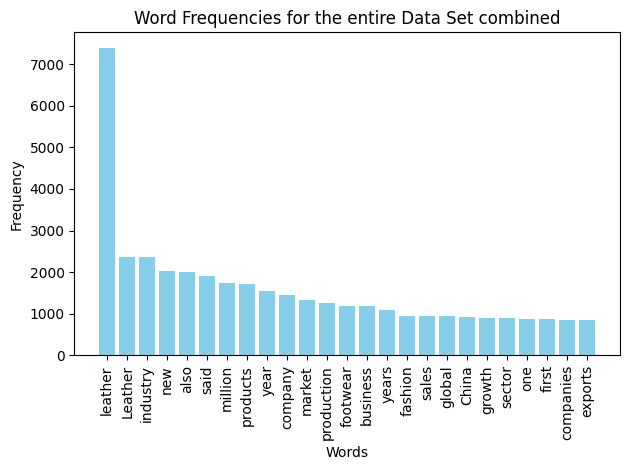

In [ ]:
all_text = ' '.join(df['Texts'])

words = word_tokenize(all_text)

filtered_words = [word for word in words if word.lower() not in stop_words]

# Creating the frequency distribution of the words that are NOT stop words
frequency_distribution = FreqDist(filtered_words)
print(frequency_distribution)
frequencyList = frequency_distribution.most_common(26)
frequencyList.pop(0)
print(frequencyList)




words = [pair[0] for pair in frequencyList]
freqs = [pair[1] for pair in frequencyList]

# Creating a bar plot
plt.bar(words, freqs, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequencies for the entire Data Set combined')
plt.xticks(rotation=90)  # Rotating x-axis labels for readability
plt.tight_layout()  # Adjusting layout to avoid clipping labels
plt.show()

#Here we create a faceted plot of the seasonal trend of word frequencies, splitting data set by season

In [ ]:
spring = df[df['Month'].isin(['March', 'April', 'May'])]
summer = df[df['Month'].isin(['June', 'July', 'August'])]
fall = df[df['Month'].isin(['September', 'October', 'November'])]
winter = df[df['Month'].isin(['December', 'January', 'February'])]

<FreqDist with 13826 samples and 109773 outcomes>
[('leather', 1741), ('Leather', 618), ('industry', 551), ('said', 532), ('million', 488), ('also', 456), ('new', 427), ('year', 390), ('products', 363), ('company', 356), ('production', 322), ('footwear', 308), ('market', 294), ('business', 292), ('years', 249), ('fashion', 236), ('first', 234), ('exports', 234), ('value', 230), ('global', 230), ('sector', 224), ('China', 221), ('Stahl', 214), ('last', 213), ('US', 213)]
<FreqDist with 16769 samples and 142749 outcomes>
[('leather', 2110), ('industry', 750), ('Leather', 612), ('also', 608), ('new', 608), ('products', 552), ('said', 545), ('year', 489), ('million', 449), ('company', 423), ('market', 411), ('production', 410), ('footwear', 332), ('years', 332), ('sales', 327), ('fashion', 320), ('business', 311), ('companies', 306), ('last', 268), ('global', 268), ('sector', 267), ('growth', 265), ('China', 260), ('first', 251), ('value', 244)]
<FreqDist with 14994 samples and 121840 outc

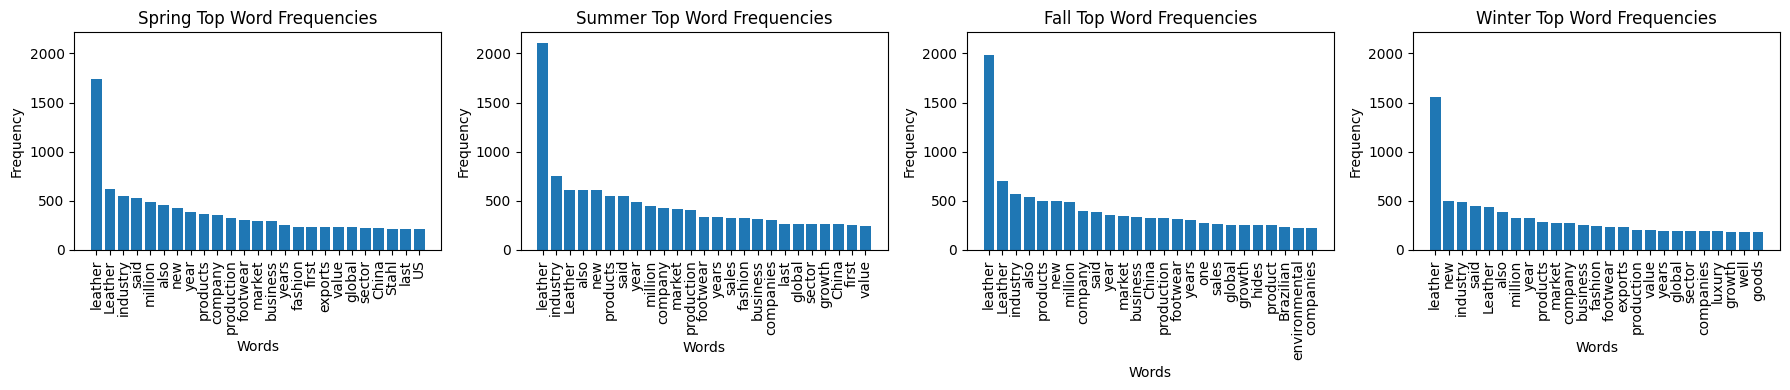

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(18, 4))
i = 0

def plotFreq(thisSeason):
  global i
  this_season_text = ' '.join(thisSeason['Texts'])

  words = word_tokenize(this_season_text)

  filtered_words = [word for word in words if word.lower() not in stop_words]

  # Creating the frequency distribution of the words that are NOT stop words
  frequency_distribution = FreqDist(filtered_words)
  print(frequency_distribution)
  frequencyList = frequency_distribution.most_common(26)
  frequencyList.pop(0)
  print(frequencyList)

  words = [pair[0] for pair in frequencyList]
  freqs = [pair[1] for pair in frequencyList]

  # Creating one of the subplots

  axes[i].bar(words,freqs)

  axes[i].set_xlabel('Words')
  axes[i].set_ylabel('Frequency')
  axes[i].set_title(f'Top Word Frequencies for {seasonNames[i]}')
  axes[i].tick_params(axis='x', rotation=90)

  i += 1


seasonNames = ['Spring','Summer','Fall','Winter']

plotFreq(spring)
plotFreq(summer)
plotFreq(fall)
plotFreq(winter)



axes[0].set_title('Spring Top Word Frequencies')
axes[1].set_title('Summer Top Word Frequencies')
axes[2].set_title('Fall Top Word Frequencies')
axes[3].set_title('Winter Top Word Frequencies')

y_min = min(ax.get_ylim()[0] for ax in axes)
y_max = max(ax.get_ylim()[1] for ax in axes)
for ax in axes:
    ax.set_ylim(y_min, y_max)
plt.tight_layout()


We can see the frequency of certain words changes depending on the season. For example. China is mentioned extensively in Fall, less so in Spring and Summer, and completely falls out of the most frequent words in Winter.

#Same thing but for titles

<FreqDist with 1377 samples and 2272 outcomes>
[('leather', 53), ('Stahl', 21), ('New', 18), ('exports', 17), ('new', 14), ('APLF', 14), ('industry', 13), ('Fashion', 13), ('Industry', 13), ('footwear', 10), ('Brazilian', 10), ('TFL', 9), ('production', 9), ('US', 9), ('Sustainability', 9), ('launches', 8), ('JBS', 8), ('East', 8), ('China', 7), ('Brazil', 7), ('IULTCS', 7), ('tannery', 7), ('Report', 7), ('International', 7), ('LANXESS', 7)]
<FreqDist with 1622 samples and 2781 outcomes>
[('Leather', 68), ('new', 26), ('New', 23), ('production', 17), ('industry', 17), ('first', 17), ('TFL', 16), ('Industry', 16), ('exports', 15), ('half', 15), ('LANXESS', 15), ('Brazilian', 14), ('.', 14), ('trade', 14), ('footwear', 12), ('Stahl', 12), ('Tannery', 12), ('Pakistan', 11), ('US', 10), ('India', 10), ('tannery', 10), ('Bangladesh', 10), ('foreign', 10), ('Vietnam', 9), ('Fashion', 9)]
<FreqDist with 1594 samples and 2664 outcomes>
[('leather', 54), ('new', 21), ('Group', 20), ('New', 19)

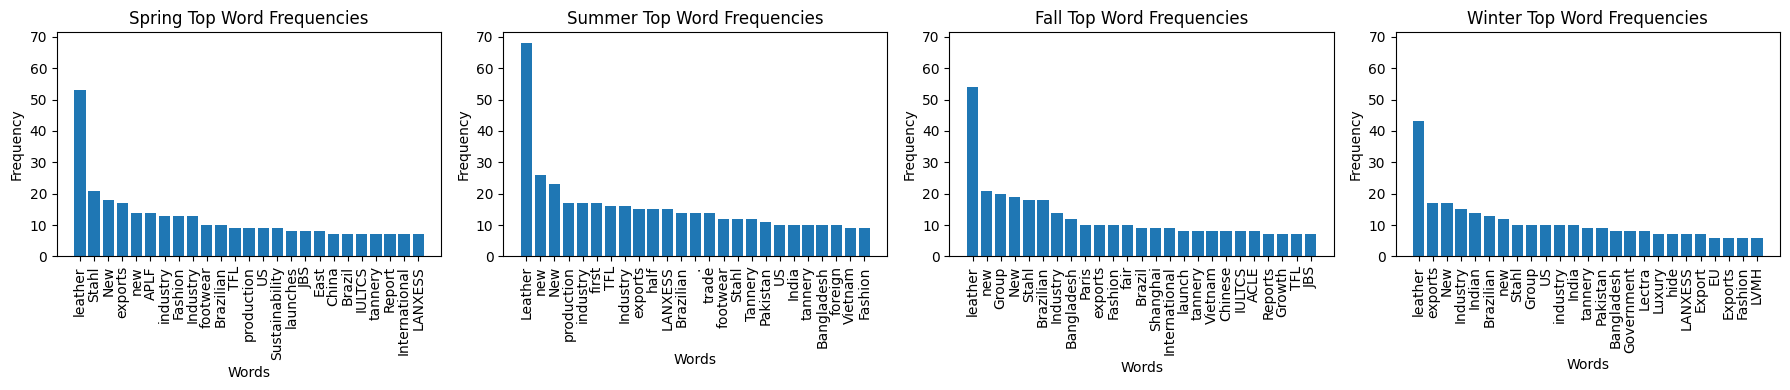

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(18, 4))
i = 0

def plotFreq(thisSeason):
  global i
  this_season_text = ' '.join(thisSeason['Title'])

  words = word_tokenize(this_season_text)

  filtered_words = [word for word in words if word.lower() not in stop_words]

  # Creating the frequency distribution of the words that are NOT stop words
  frequency_distribution = FreqDist(filtered_words)
  print(frequency_distribution)
  frequencyList = frequency_distribution.most_common(26)
  frequencyList.pop(0)
  print(frequencyList)

  words = [pair[0] for pair in frequencyList]
  freqs = [pair[1] for pair in frequencyList]

  # Creating one of the subplots

  axes[i].bar(words,freqs)

  axes[i].set_xlabel('Words')
  axes[i].set_ylabel('Frequency')
  axes[i].set_title(f'Top Word Frequencies for {seasonNames[i]}')
  axes[i].tick_params(axis='x', rotation=90)

  i += 1


seasonNames = ['Spring','Summer','Fall','Winter']

plotFreq(spring)
plotFreq(summer)
plotFreq(fall)
plotFreq(winter)



axes[0].set_title('Spring Top Word Frequencies')
axes[1].set_title('Summer Top Word Frequencies')
axes[2].set_title('Fall Top Word Frequencies')
axes[3].set_title('Winter Top Word Frequencies')

y_min = min(ax.get_ylim()[0] for ax in axes)
y_max = max(ax.get_ylim()[1] for ax in axes)
for ax in axes:
    ax.set_ylim(y_min, y_max)
plt.tight_layout()


It appears that there may be more articles produced in summer, but trends become apparent when comparing which words appear consistently in the list of most frequent words, and which words do not. Leather, fashion, industry, footwear and Stahl are mentioned very frequently and conistently across the seasons. In contrast, Bangladesh and Vietnam were mentioned frequently only in Summer, Fall, and Winter, falling out of the list of top words in Spring. Similarly, the EU is mentioned frequently in Winter, but does not appear in the 25 most frequent words in any other season.

In [ ]:
df['Title'].head(25)

0         Stahl expands ZDHC level 3certified portfolio
1     Birkenstock Posts 1.492 Billion Revenues in Fi...
2     Macys Inc. Rejects Unsolicited Proposal from A...
3     EU Cracks Down on Greenwashing and Misleading ...
4     Burberry Adjusts Financial Outlook Amidst Luxu...
5     COTANCE Joins Forces with EU Industries Urging...
6     Ambiente exhibitors offer solutions for the in...
7        Spanish Shoe Exports Face Consecutive Declines
8             JD Sports Fashion Plcs Peak Season Update
9     Stahl takes next step in strategic journey wit...
10    Interhides Expands Footprint in Leather Indust...
11    American Outdoor Brands Appoints James Tayon t...
12    CoupangElevates Global Retail Dominance with S...
13    Saint Laurent Unveils CuttingEdge Leather Good...
14    LVMH Unveils Impressive Environmental Mileston...
15         Lanvin Group Undergoes Leadership Transition
16    Pecca Group Achieves Fifth Consecutive Quarter...
17     Tods Unveils Digital Product Passports fo

In [ ]:
# stop_words = set(stopwords.words('english'))


# def POS(text: str):
#   tokenizer = RegexpTokenizer(r'\w+')
#   word_tokens = tokenizer.tokenize(text)

#   # remove stop words
#   filtered_words = [word for word in word_tokens if word.lower() not in stop_words]
#   #print(filtered_words)

#   pos_tags = pos_tag(filtered_words)
#   print(pos_tags)


# POS(df.loc[14,"Title"])
# # for index, row in df.iterrows():
# #   tokenize(row["Texts"])

#Next, we use Spacy to effectively visualize the occurrence and typing of named entities in articles from the dataset.

In [ ]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [ ]:
# doc = nlp('European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices')
# print([(X.text, X.label_) for X in doc.ents])
# print([(X, X.ent_iob_, X.ent_type_) for X in doc])


In [ ]:
displacy.render(nlp(str(df.loc[86,'Texts'])), jupyter=True, style='ent')

#Next, we visualize/display the trends in product mentions by creating a word cloud that displays identified products sized by their frequency


Preparing the text of products for use in the wordcloud generation

---



In [ ]:
products = ""

for index, row in df.iterrows():
  #global i
  text = row["Texts"]
  # Process the text with spaCy
  doc = nlp(text)

  # Extract entities identified by spaCy's NER
  for ent in doc.ents:
      #print(ent,ent.label_)
      if ent.label_ == "PRODUCT":
        products += ent.text + " "

  # Remove duplicate products
  #products = list(set(products))

  # Print the identified product mentions
  #print(products)
  #print(products,i)
  #i += 1

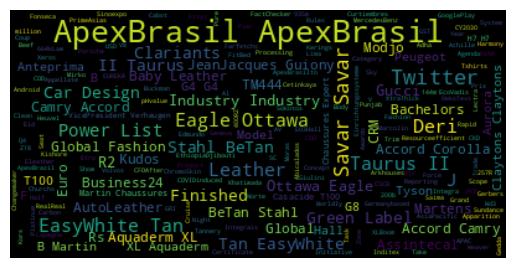

In [ ]:
text = products


# Creating and generating a word cloud image:
wordcloud = WordCloud().generate(text)

# Displaying the generated word cloud:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#Next, we create a word cloud of all entities mentioned in each article, showcasing the entities that have been mentioned most frequently

In [ ]:
entities = ""

for index, row in df.iterrows():
  #global i
  text = row["Texts"]
  # Process the text with spaCy
  doc = nlp(text)

  # Extract entities identified by spaCy's NER
  for ent in doc.ents:
      #print(ent,ent.label_)
      entities += ent.text + ", "
  # print(entities)

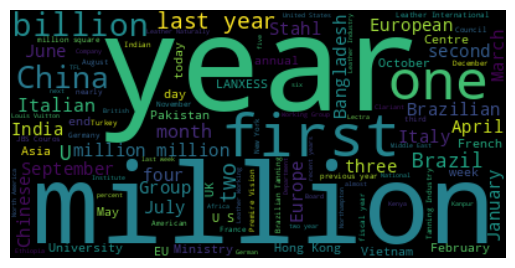

In [ ]:
text = entities


# Creating and generating a word cloud image:
wordcloud = WordCloud().generate(text)

# Displaying the generated word cloud:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Here we build a timeline of events using the spaCy library and the .label_ function.

In [ ]:
timeline = pd.DataFrame(columns = ["Date", "Event"])
nlp = spacy.load('en_core_web_sm')
for i in df.index:
  doc = nlp(df["Texts"][i])
  for token in doc.ents:
    if token.label_ == "EVENT":
      newRow = {"Date": df["Date"][i], "Event": token.text}
      timeline = pd.concat([timeline, pd.DataFrame([newRow])], ignore_index = True)
timeline.iloc[::-1]

,Date,Event
196,1 August 2005,the Open Day
195,10 August 2005,AI
194,2 September 2005,the Industrial Age
193,13 November 2007,the Korangi Industrial Area
192,16 November 2007,FimecNovo Hamburgo
...,...,...
4,4 May 2023,Paris Agreement
3,4 May 2023,Paris Agreement
2,7 November 2023,Spring Summer
1,7 November 2023,Spring Summer


In [ ]:
timeline["Date Formatted"] = ""
timeline["Next Month"] = ""

def serialize_datetime(obj):
    if isinstance(obj, datetime.datetime):
        return obj.isoformat()
    raise TypeError("Type not serializable")

Formatting of dates to be used in timeline graph

In [ ]:
for i in timeline.index:
  date = timeline["Date"][i].split(" ")

  if len(date[0]) == 1:
    date[0] = "0" + date[0]

  match date[1]:
    case "January":
      month = "01"
      nextMonth = "02"
    case "February":
      month = "02"
      nextMonth = "03"
    case "March":
      month = "03"
      nextMonth = "04"
    case "April":
      month = "04"
      nextMonth = "05"
    case "May":
      month = "05"
      nextMonth = "06"
    case "June":
      month = "06"
      nextMonth = "07"
    case "July":
      month = "07"
      nextMonth = "08"
    case "August":
      month = "08"
      nextMonth = "09"
    case "September":
      month = "09"
      nextMonth = "10"
    case "October":
      month = "10"
      nextMonth = "11"
    case "November":
      month = "11"
      nextMonth = "12"
    case "December":
      month = "12"
      nextMonth = "1"

  timeline["Date Formatted"][i] = json.dumps(date[2] + "-" + month + "-" + date[0], default = serialize_datetime)
  timeline["Next Month"][i] = json.dumps(date[2] + "-" + nextMonth + "-" + "01", default = serialize_datetime)

Building a timeline with the Altair library

In [ ]:
bars = alt.Chart(timeline).mark_bar(color = "#842593").encode(x="Date Formatted", x2="Next Month", y=alt.Y("Event", sort="-x"))
text = bars.mark_text(align = "left", baseline = "middle", dx = 3).encode(text = "Event")
(bars + text).properties(height = 800, width = 1200).configure(background = "#54a0cc")

alt.LayerChart(...)